In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ptick ##これが必要！

In [2]:
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})



In [9]:
print('等分散を仮定')
# 両側t検定　
#１年毎正式版
cols = ['DateTime', 'gap_price[intra-spot](円/kWh)']

df_select = df_king[cols]

re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)'
    #    , 'エリア毎の広域予備率の平均値(%)'
       ]
df_select.columns = re_col

percent =50
# これは各年

for xyear in range(2018,2023):

    for yyear in range(2018,2023):
    # year=2022
        xstart_point = dt.datetime(xyear,1,1,0,0)
        xend_point = dt.datetime(xyear,12,31,23,30)
        ystart_point = dt.datetime(yyear,1,1,0,0)
        yend_point = dt.datetime(yyear,12,31,23,30)

        name =  '価格差 (時間前市場 - スポット市場) (Yen/kWh)'

        df = df_select[['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)']]
        dfx = df[(df['DateTime']>=xstart_point)&(df['DateTime']<=xend_point)].dropna()
        dfx['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(dfx['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
        dfy = df[(df['DateTime']>=ystart_point)&(df['DateTime']<=yend_point)].dropna()
        dfy['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(dfy['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])



        # df['judge'] =0

        df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
        # judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)

        # df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1

        value0 = dfx['価格差 (時間前市場 - スポット市場) (Yen/kWh)'].values
        value1 = dfy['価格差 (時間前市場 - スポット市場) (Yen/kWh)'].values
        # times =df['DateTime'].dt.date.values

        X=value0
        Y=value1
        print('')
        print(xyear,yyear)       
        t_value, p_value = stats.ttest_ind(X, Y, alternative='two-sided',equal_var=False)
        print("t_value:", t_value)
        print("p_value:", p_value)

        
        if p_value < 0.025:
            # print(f"p = {p_value:.3f} のため、帰無仮説が棄却されました。ある より ない　は大きい")

            print(f"{p_value:.3f} のため、帰無仮説が採択されました。あるとないに差がある")
        else:
            print(f"{p_value:.3f} のため、帰無仮説が採択されました。あるとないに差はありません")


等分散を仮定

2018 2018
t_value: 0.0
p_value: 1.0
1.000 のため、帰無仮説が採択されました。あるとないに差はありません

2018 2019
t_value: 3.8156578057931823
p_value: 0.00013608323135133938
0.000 のため、帰無仮説が採択されました。あるとないに差がある

2018 2020
t_value: 1.3735321462024228
p_value: 0.16959671710615198
0.170 のため、帰無仮説が採択されました。あるとないに差はありません

2018 2021
t_value: -23.917227046087355
p_value: 1.189477526275117e-124
0.000 のため、帰無仮説が採択されました。あるとないに差がある

2018 2022
t_value: -80.37705438072388
p_value: 0.0
0.000 のため、帰無仮説が採択されました。あるとないに差がある

2019 2018
t_value: -3.8156578057931823
p_value: 0.00013608323135133938
0.000 のため、帰無仮説が採択されました。あるとないに差がある

2019 2019
t_value: 0.0
p_value: 1.0
1.000 のため、帰無仮説が採択されました。あるとないに差はありません

2019 2020
t_value: -2.2161186140166063
p_value: 0.02668986107836325
0.027 のため、帰無仮説が採択されました。あるとないに差はありません

2019 2021
t_value: -25.259706341482598
p_value: 1.3935102621479856e-138
0.000 のため、帰無仮説が採択されました。あるとないに差がある

2019 2022
t_value: -82.15736717849353
p_value: 0.0
0.000 のため、帰無仮説が採択されました。あるとないに差がある

2020 2018
t_value: -1.373532146202422

In [5]:
print('等分散を仮定')
#片側t検定　ある方がない方より大きい 
#１年毎正式版
cols = ['DateTime', 'gap_price[intra-spot](円/kWh)']

df_select = df_king[cols]

re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)'
    #    , 'エリア毎の広域予備率の平均値(%)'
       ]
df_select.columns = re_col

percent =50
# これは各年

for xyear in range(2018,2023):

    for yyear in range(2018,2023):
    # year=2022
        xstart_point = dt.datetime(xyear,1,1,0,0)
        xend_point = dt.datetime(xyear,12,31,23,30)
        ystart_point = dt.datetime(yyear,1,1,0,0)
        yend_point = dt.datetime(yyear,12,31,23,30)

        name =  '価格差 (時間前市場 - スポット市場) (Yen/kWh)'

        df = df_select[['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)']]
        dfx = df[(df['DateTime']>=xstart_point)&(df['DateTime']<=xend_point)].dropna()
        dfx['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(dfx['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
        dfy = df[(df['DateTime']>=ystart_point)&(df['DateTime']<=yend_point)].dropna()
        dfy['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(dfy['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])



        # df['judge'] =0

        df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
        # judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)

        # df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1

        value0 = dfx['価格差 (時間前市場 - スポット市場) (Yen/kWh)'].values
        value1 = dfy['価格差 (時間前市場 - スポット市場) (Yen/kWh)'].values
        # times =df['DateTime'].dt.date.values

        X=value0
        Y=value1
        print('')
        print(xyear,yyear)       
        t_value, p_value = stats.ttest_ind(X, Y, alternative='greater',equal_var=True)
        print("t_value:", t_value)
        print("p_value:", p_value)

        
        if p_value < 0.05:
            print(f"p = {p_value:.3f} のため、帰無仮説が棄却されました。ある より ない　は大きい")

            # print(f"{p_value:.3f} のため、帰無仮説が採択されました。あるとないに差がある")
        else:
            print(f"{p_value:.3f} のため、帰無仮説が採択されました。あるとないに差はありません")


等分散を仮定

2018 2018
t_value: 0.0
p_value: 0.5
0.500 のため、帰無仮説が採択されました。あるとないに差はありません

2018 2019
t_value: 3.7731843063272765
p_value: 8.073583263393683e-05
p = 0.000 のため、帰無仮説が棄却されました。ある より ない　は大きい

2018 2020
t_value: 1.3401626155280177
p_value: 0.09010105832812004
0.090 のため、帰無仮説が採択されました。あるとないに差はありません

2018 2021
t_value: -21.64477351646897
p_value: 1.0
1.000 のため、帰無仮説が採択されました。あるとないに差はありません

2018 2022
t_value: -73.28929920663772
p_value: 1.0
1.000 のため、帰無仮説が採択されました。あるとないに差はありません

2019 2018
t_value: -3.7731843063272765
p_value: 0.9999192641673661
1.000 のため、帰無仮説が採択されました。あるとないに差はありません

2019 2019
t_value: 0.0
p_value: 0.5
0.500 のため、帰無仮説が採択されました。あるとないに差はありません

2019 2020
t_value: -2.215750275198809
p_value: 0.9866424984182484
0.987 のため、帰無仮説が採択されました。あるとないに差はありません

2019 2021
t_value: -25.25526840729393
p_value: 1.0
1.000 のため、帰無仮説が採択されました。あるとないに差はありません

2019 2022
t_value: -82.15736717849353
p_value: 1.0
1.000 のため、帰無仮説が採択されました。あるとないに差はありません

2020 2018
t_value: -1.3401626155280177
p_value: 0.9098989416718

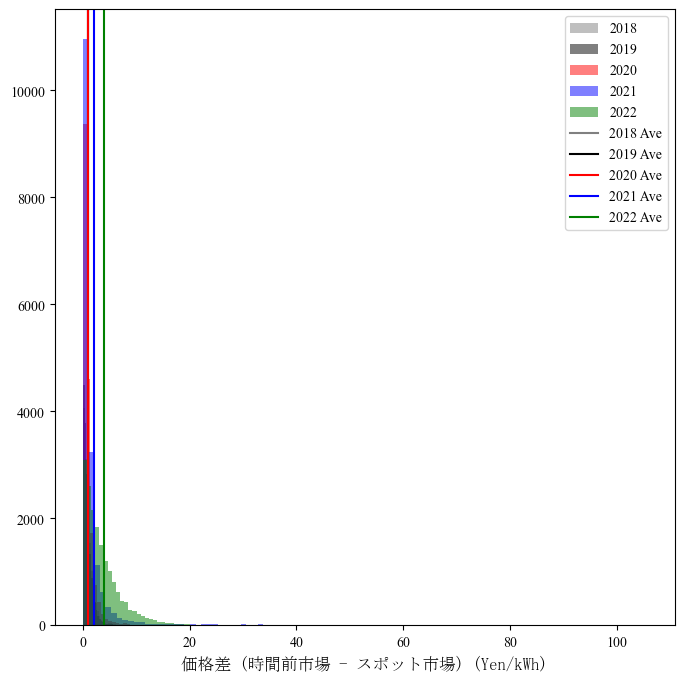

In [31]:
# 価格差のグラフを描くかあ


cols = ['DateTime', 'gap_price[intra-spot](円/kWh)']

df_select = df_king[cols]

re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)'
    #    , 'エリア毎の広域予備率の平均値(%)'
       ]
df_select.columns = re_col
name ='価格差 (時間前市場 - スポット市場) (Yen/kWh)'
year = 2022


value2018 = abs(df_select[df_select['DateTime'].dt.year ==2018][name].dropna().values)

value2019 = abs(df_select[df_select['DateTime'].dt.year ==2019][name].dropna().values)

value2020 = abs(df_select[df_select['DateTime'].dt.year ==2020][name].dropna().values)

value2021 = abs(df_select[df_select['DateTime'].dt.year ==2021][name].dropna().values)

value2022 = abs(df_select[df_select['DateTime'].dt.year ==2022][name].dropna().values)


plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure(figsize=(8,8))
ax= fig.subplots()
ax.hist(value2018,bins=100,alpha= 0.5,label=2018,color ='gray')
ax.hist(value2019,bins=100,alpha= 0.5,label=2019,color ='black')
ax.hist(value2020,bins=100,alpha= 0.5,label=2020,color ='r')
ax.hist(value2021,bins=100,alpha= 0.5,label=2021,color ='b')
ax.hist(value2022,bins=100,alpha= 0.5,label=2022,color ='g')
plt.legend()

ax.axvline(value2018.mean(),label='2018 Ave',color ='gray')
ax.axvline(value2019.mean(),label='2019 Ave',color ='black')
ax.axvline(value2020.mean(),label='2020 Ave',color ='r')
ax.axvline(value2021.mean(),label='2021 Ave',color ='b')
ax.axvline(value2022.mean(),label='2022 Ave',color ='g')

plt.legend()
ax.set_xlabel(name,fontname='MS Mincho',fontsize=12)
plt.savefig('../../../卒論関連書類/画像/3章画像/分析結果画像/価格差の絶対値の分布/絶対値years.png')

plt.show()



In [ ]:


cols = ['DateTime', 'gap_price[intra-spot](円/kWh)']

df_select = df_king[cols]

re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)'
    #    , 'エリア毎の広域予備率の平均値(%)'
       ]
df_select.columns = re_col
name ='価格差 (時間前市場 - スポット市場) (Yen/kWh)'
year = 2022


value2018 = abs(df_select[df_select['DateTime'].dt.year ==2018][name].dropna().values)

value2019 = abs(df_select[df_select['DateTime'].dt.year ==2019][name].dropna().values)

value2020 = abs(df_select[df_select['DateTime'].dt.year ==2020][name].dropna().values)

value2021 = abs(df_select[df_select['DateTime'].dt.year ==2021][name].dropna().values)

value2022 = abs(df_select[df_select['DateTime'].dt.year ==2022][name].dropna().values)


plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot()
ax.hist(value2018,bins=100,alpha= 0.5,label=2018,color ='gray')
ax.hist(value2019,bins=100,alpha= 0.5,label=2019,color ='black')
ax.hist(value2020,bins=100,alpha= 0.5,label=2020,color ='r')
ax.hist(value2021,bins=100,alpha= 0.5,label=2021,color ='b')
ax.hist(value2022,bins=100,alpha= 0.5,label=2022,color ='g')
plt.legend()

ax.axvline(value2018.mean(),label='2018 Ave',color ='gray')
ax.axvline(value2019.mean(),label='2019 Ave',color ='black')
ax.axvline(value2020.mean(),label='2020 Ave',color ='r')
ax.axvline(value2021.mean(),label='2021 Ave',color ='b')
ax.axvline(value2022.mean(),label='2022 Ave',color ='g')

plt.legend()
ax.set_xlabel(name,fontname='MS Mincho',fontsize=12)
# plt.savefig('../../../卒論関連書類/画像/3章画像/分析結果画像/価格差の絶対値の分布/絶対値years.png')

plt.show()


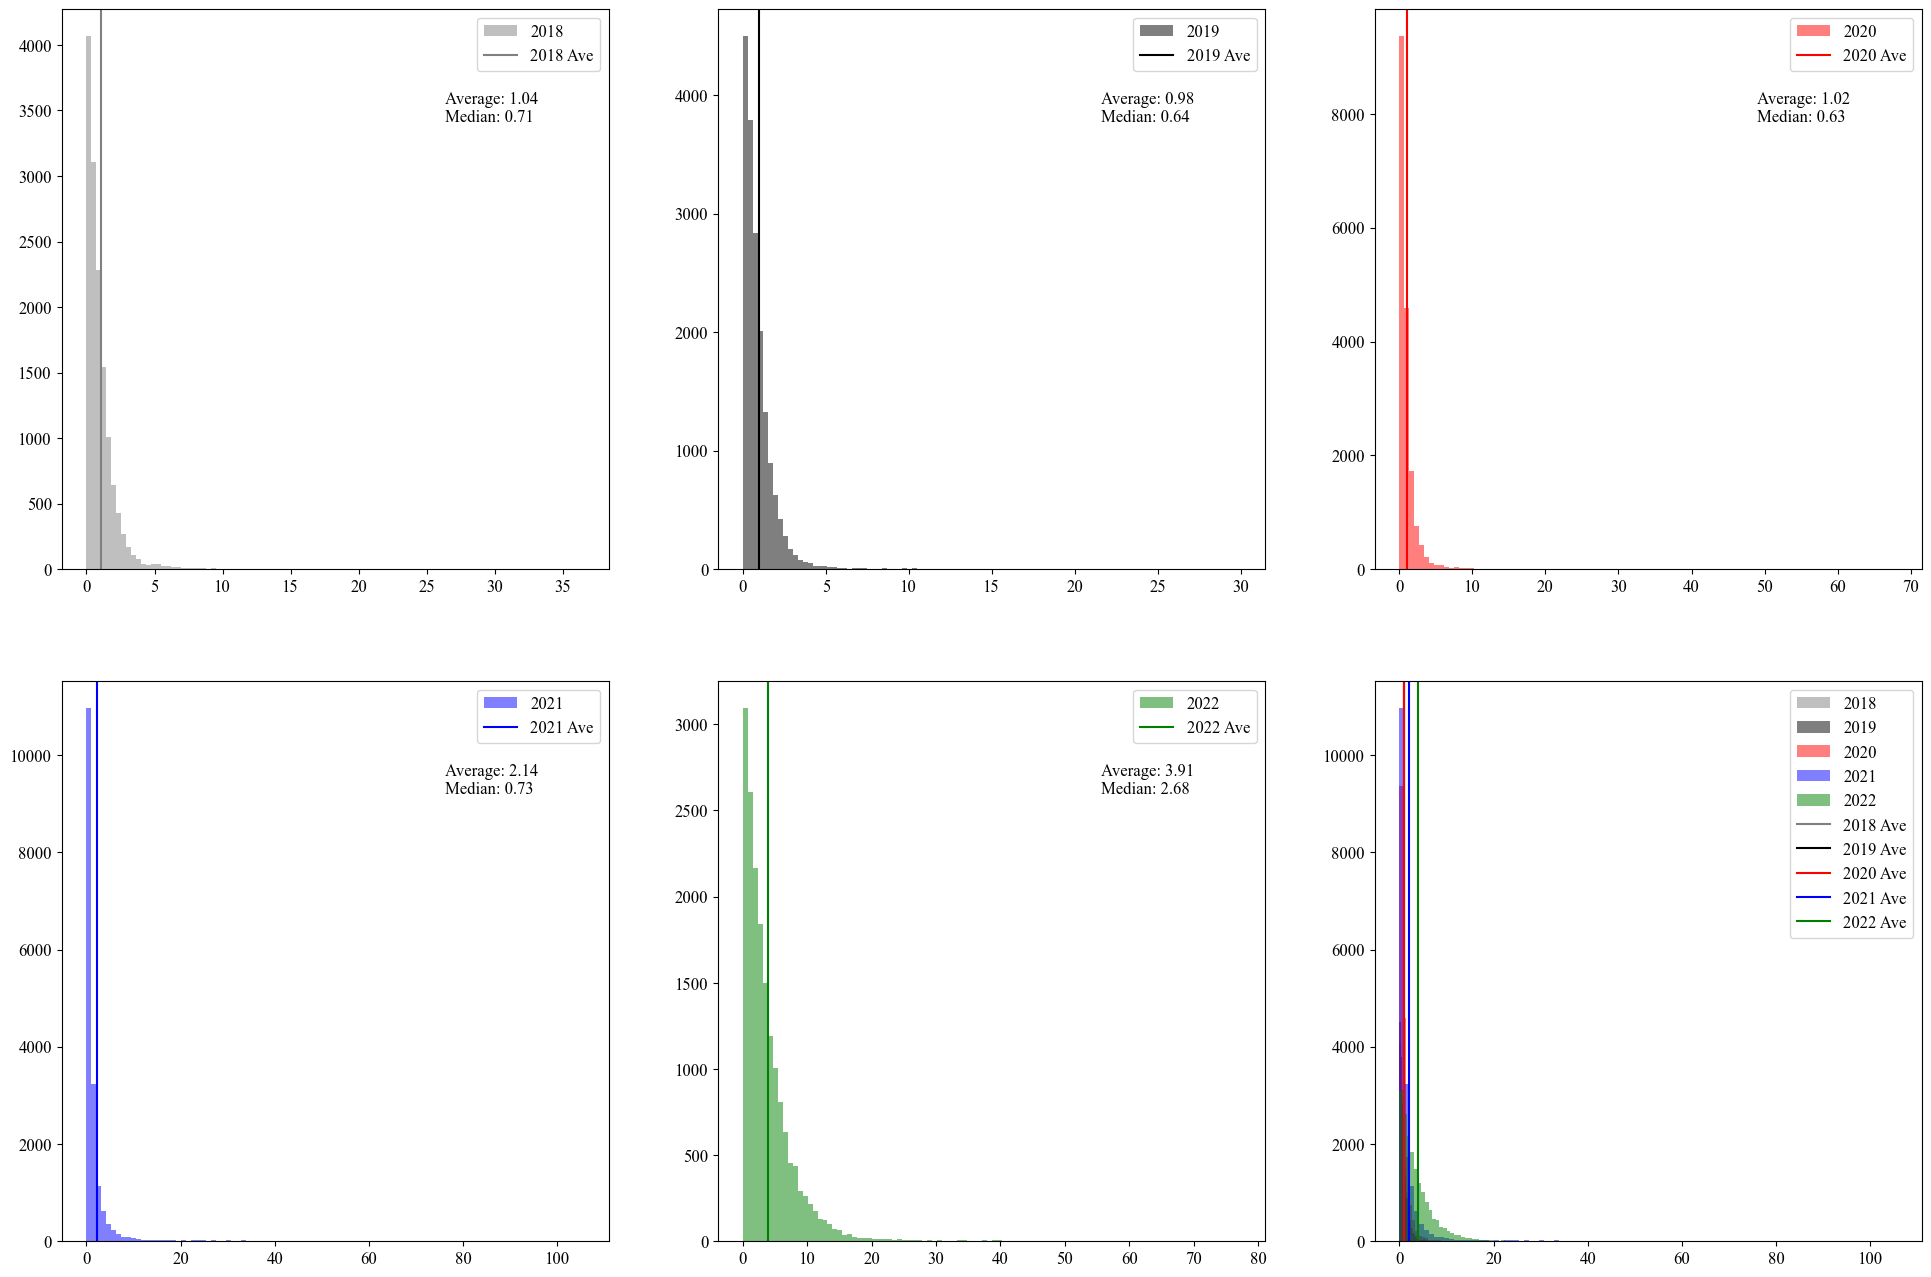

In [64]:
# 絶対値の分布
value2018 = abs(df_select[df_select['DateTime'].dt.year ==2018][name].dropna().values)

value2019 = abs(df_select[df_select['DateTime'].dt.year ==2019][name].dropna().values)

value2020 = abs(df_select[df_select['DateTime'].dt.year ==2020][name].dropna().values)

value2021 = abs(df_select[df_select['DateTime'].dt.year ==2021][name].dropna().values)

value2022 = abs(df_select[df_select['DateTime'].dt.year ==2022][name].dropna().values)



plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] =12

fig = plt.figure(figsize=(24,16))
ax1= fig.add_subplot(2,3,1)
ax2= fig.add_subplot(2,3,2)
ax3= fig.add_subplot(2,3,3)
ax4= fig.add_subplot(2,3,4)
ax5= fig.add_subplot(2,3,5)
ax= fig.add_subplot(2,3,6)

# ax= fig.add_subplot()
ax1.hist(value2018,bins=100,alpha= 0.5,label=2018,color ='gray')

ax2.hist(value2019,bins=100,alpha= 0.5,label=2019,color ='black')
ax3.hist(value2020,bins=100,alpha= 0.5,label=2020,color ='r')
ax4.hist(value2021,bins=100,alpha= 0.5,label=2021,color ='b')
ax5.hist(value2022,bins=100,alpha= 0.5,label=2022,color ='g')


ax1.axvline(value2018.mean(),label='2018 Ave',color ='gray')
ax2.axvline(value2019.mean(),label='2019 Ave',color ='black')
ax3.axvline(value2020.mean(),label='2020 Ave',color ='r')
ax4.axvline(value2021.mean(),label='2021 Ave',color ='b')
ax5.axvline(value2022.mean(),label='2022 Ave',color ='g')


ax.hist(value2018,bins=100,alpha= 0.5,label=2018,color ='gray')
ax.hist(value2019,bins=100,alpha= 0.5,label=2019,color ='black')
ax.hist(value2020,bins=100,alpha= 0.5,label=2020,color ='r')
ax.hist(value2021,bins=100,alpha= 0.5,label=2021,color ='b')
ax.hist(value2022,bins=100,alpha= 0.5,label=2022,color ='g')


ax.axvline(value2018.mean(),label='2018 Ave',color ='gray')
ax.axvline(value2019.mean(),label='2019 Ave',color ='black')
ax.axvline(value2020.mean(),label='2020 Ave',color ='r')
ax.axvline(value2021.mean(),label='2021 Ave',color ='b')
ax.axvline(value2022.mean(),label='2022 Ave',color ='g')


ax.legend()
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
roundnum=2
x_text=0.7
fontsize=12
ax1.text(x_text,0.8,f'Average: {round(value2018.mean(),roundnum)}\nMedian: {round(np.median(value2018),roundnum)}',transform=ax1.transAxes)
ax2.text(x_text,0.8,f'Average: {round(value2019.mean(),roundnum)}\nMedian: {round(np.median(value2019),roundnum)}',transform=ax2.transAxes)
ax3.text(x_text,0.8,f'Average: {round(value2020.mean(),roundnum)}\nMedian: {round(np.median(value2020),roundnum)}',transform=ax3.transAxes)
ax4.text(x_text,0.8,f'Average: {round(value2021.mean(),roundnum)}\nMedian: {round(np.median(value2021),roundnum)}',transform=ax4.transAxes)
ax5.text(x_text,0.8,f'Average: {round(value2022.mean(),roundnum)}\nMedian: {round(np.median(value2022),roundnum)}',transform=ax5.transAxes)

plt.savefig('../../../卒論関連書類/画像/3章画像/分析結果画像/価格差の絶対値の分布/絶対値一覧years.png')



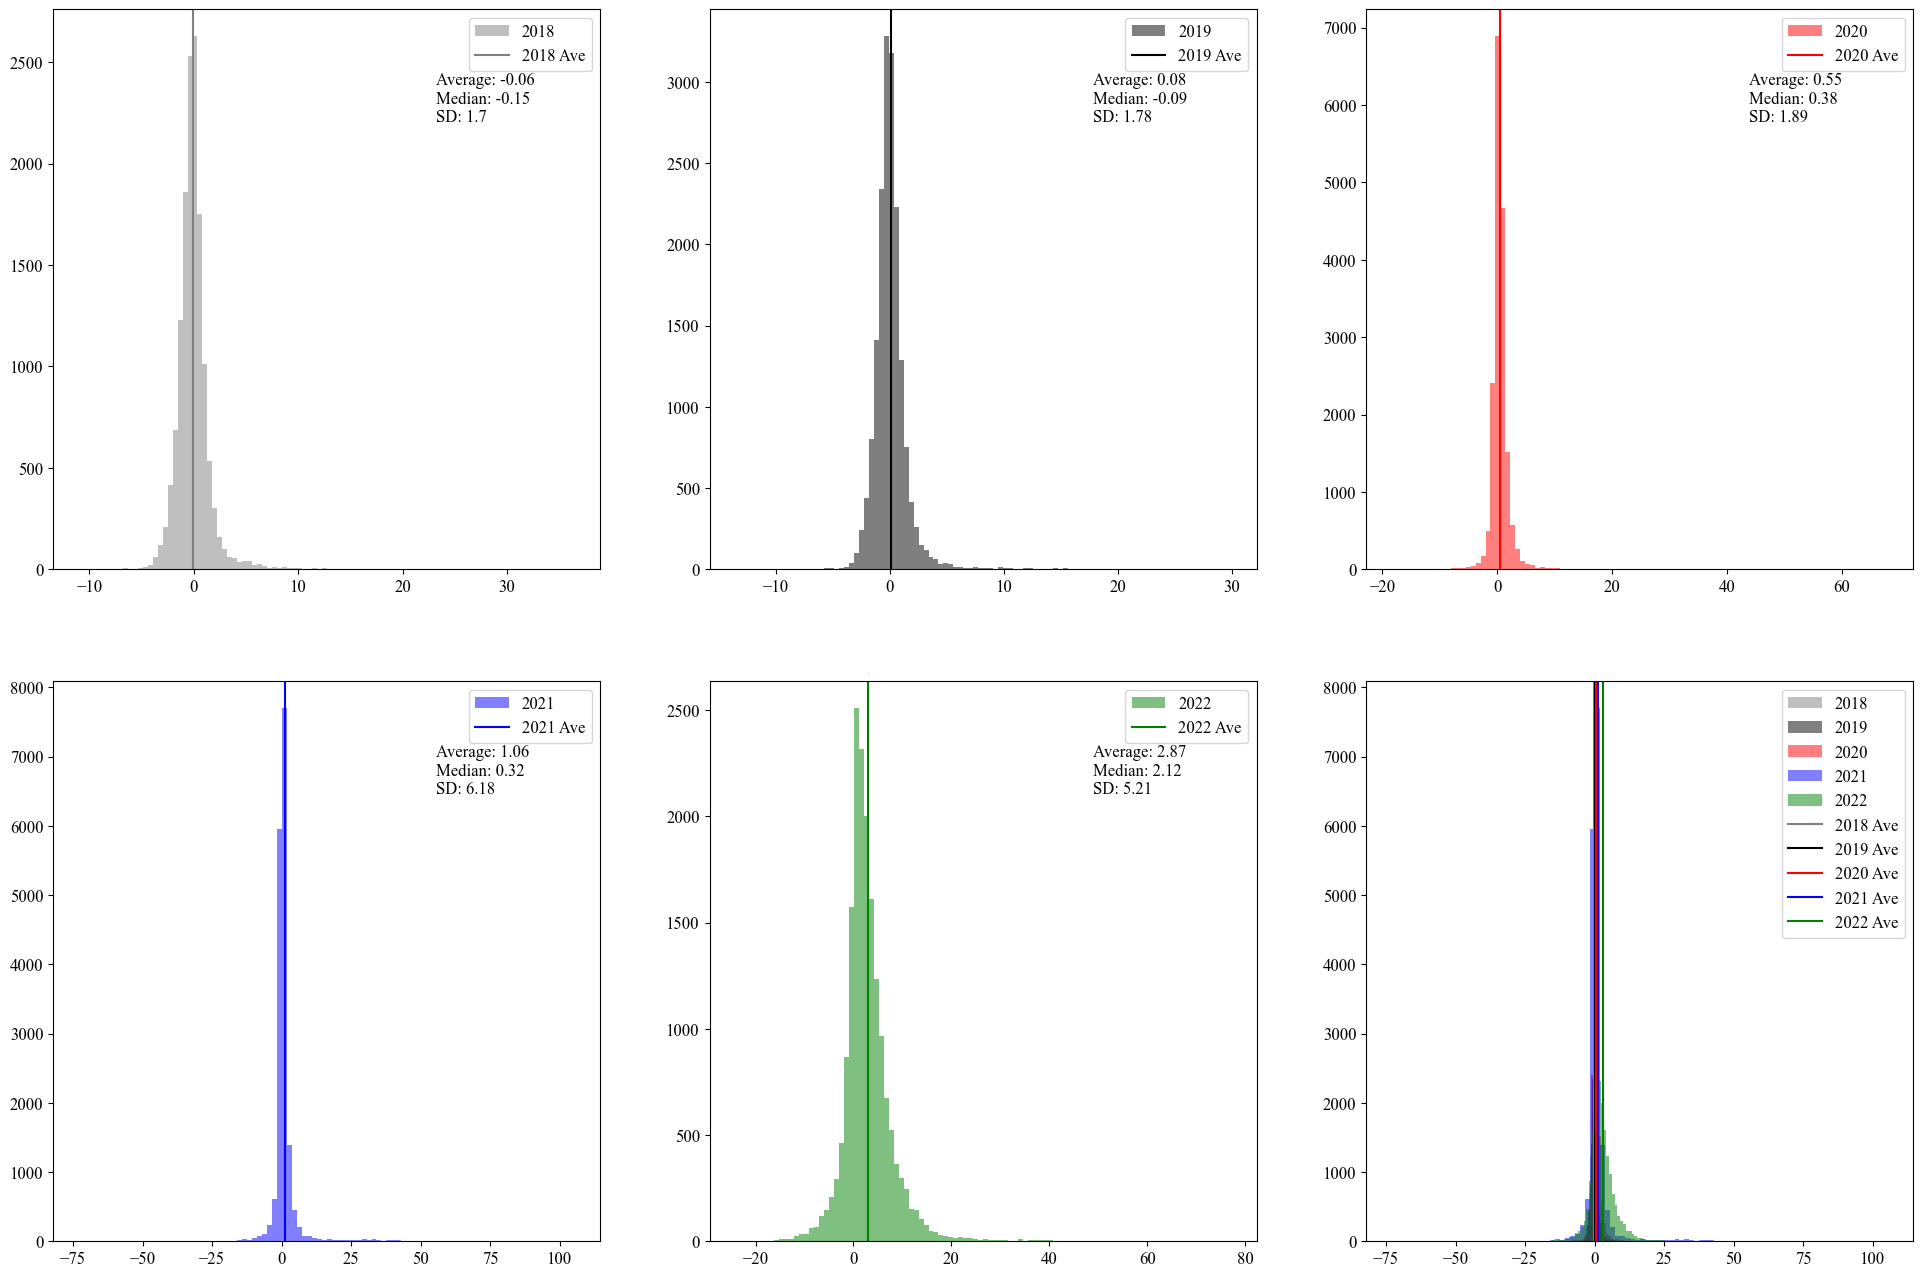

In [63]:
# 絶対値じゃないものの分布



value2018 = df_select[df_select['DateTime'].dt.year ==2018][name].dropna().values

value2019 = df_select[df_select['DateTime'].dt.year ==2019][name].dropna().values

value2020 = df_select[df_select['DateTime'].dt.year ==2020][name].dropna().values

value2021 = df_select[df_select['DateTime'].dt.year ==2021][name].dropna().values

value2022 = df_select[df_select['DateTime'].dt.year ==2022][name].dropna().values



# 絶対値の分布
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] =12

fig = plt.figure(figsize=(24,16))
ax1= fig.add_subplot(2,3,1)
ax2= fig.add_subplot(2,3,2)
ax3= fig.add_subplot(2,3,3)
ax4= fig.add_subplot(2,3,4)
ax5= fig.add_subplot(2,3,5)
ax= fig.add_subplot(2,3,6)

# ax= fig.add_subplot()
ax1.hist(value2018,bins=100,alpha= 0.5,label=2018,color ='gray')

ax2.hist(value2019,bins=100,alpha= 0.5,label=2019,color ='black')
ax3.hist(value2020,bins=100,alpha= 0.5,label=2020,color ='r')
ax4.hist(value2021,bins=100,alpha= 0.5,label=2021,color ='b')
ax5.hist(value2022,bins=100,alpha= 0.5,label=2022,color ='g')


ax1.axvline(value2018.mean(),label='2018 Ave',color ='gray')
ax2.axvline(value2019.mean(),label='2019 Ave',color ='black')
ax3.axvline(value2020.mean(),label='2020 Ave',color ='r')
ax4.axvline(value2021.mean(),label='2021 Ave',color ='b')
ax5.axvline(value2022.mean(),label='2022 Ave',color ='g')


ax.hist(value2018,bins=100,alpha= 0.5,label=2018,color ='gray')
ax.hist(value2019,bins=100,alpha= 0.5,label=2019,color ='black')
ax.hist(value2020,bins=100,alpha= 0.5,label=2020,color ='r')
ax.hist(value2021,bins=100,alpha= 0.5,label=2021,color ='b')
ax.hist(value2022,bins=100,alpha= 0.5,label=2022,color ='g')


ax.axvline(value2018.mean(),label='2018 Ave',color ='gray')
ax.axvline(value2019.mean(),label='2019 Ave',color ='black')
ax.axvline(value2020.mean(),label='2020 Ave',color ='r')
ax.axvline(value2021.mean(),label='2021 Ave',color ='b')
ax.axvline(value2022.mean(),label='2022 Ave',color ='g')


ax.legend()
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
roundnum=2
x_text=0.7
fontsize=12
ax1.text(x_text,0.8,f'Average: {round(value2018.mean(),roundnum)}\nMedian: {round(np.median(value2018),roundnum)}\nSD: {round(np.std(value2018),roundnum)}',transform=ax1.transAxes)
ax2.text(x_text,0.8,f'Average: {round(value2019.mean(),roundnum)}\nMedian: {round(np.median(value2019),roundnum)}\nSD: {round(np.std(value2019),roundnum)}',transform=ax2.transAxes)
ax3.text(x_text,0.8,f'Average: {round(value2020.mean(),roundnum)}\nMedian: {round(np.median(value2020),roundnum)}\nSD: {round(np.std(value2020),roundnum)}',transform=ax3.transAxes)
ax4.text(x_text,0.8,f'Average: {round(value2021.mean(),roundnum)}\nMedian: {round(np.median(value2021),roundnum)}\nSD: {round(np.std(value2021),roundnum)}',transform=ax4.transAxes)
ax5.text(x_text,0.8,f'Average: {round(value2022.mean(),roundnum)}\nMedian: {round(np.median(value2022),roundnum)}\nSD: {round(np.std(value2022),roundnum)}',transform=ax5.transAxes)

plt.savefig('../../../卒論関連書類/画像/3章画像/分析結果画像/価格差の絶対値の分布/絶対値じゃない分布一覧years.png')



In [70]:
# 絶対値をつけないやつの検定

print('等分散を仮定')
#片側t検定　ある方がない方より大きい 
#１年毎正式版
cols = ['DateTime', 'gap_price[intra-spot](円/kWh)']

df_select = df_king[cols]

re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)'
    #    , 'エリア毎の広域予備率の平均値(%)'
       ]
df_select.columns = re_col

percent =50
# これは各年

for xyear in range(2018,2023):

    for yyear in range(2018,2023):
    # year=2022
        xstart_point = dt.datetime(xyear,1,1,0,0)
        xend_point = dt.datetime(xyear,12,31,23,30)
        ystart_point = dt.datetime(yyear,1,1,0,0)
        yend_point = dt.datetime(yyear,12,31,23,30)

        name =  '価格差 (時間前市場 - スポット市場) (Yen/kWh)'

        df = df_select[['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)']]
        dfx = df[(df['DateTime']>=xstart_point)&(df['DateTime']<=xend_point)].dropna()
        dfx['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =dfx['価格差 (時間前市場 - スポット市場) (Yen/kWh)']
        dfy = df[(df['DateTime']>=ystart_point)&(df['DateTime']<=yend_point)].dropna()
        dfy['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =dfy['価格差 (時間前市場 - スポット市場) (Yen/kWh)']



        # df['judge'] =0

        # df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
        # judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)

        # df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1

        value0 = dfx['価格差 (時間前市場 - スポット市場) (Yen/kWh)'].values
        value1 = dfy['価格差 (時間前市場 - スポット市場) (Yen/kWh)'].values
        # times =df['DateTime'].dt.date.values

        X=value0
        Y=value1
        print('')
        print(xyear,yyear)       
        t_value, p_value = stats.ttest_ind(X, Y, alternative='greater',equal_var=False)
        print("t_value:", t_value)
        print("p_value:", p_value)

        
        if p_value < 0.05:
            print(f"p = {p_value:.3f} のため、帰無仮説が棄却されました。ある より ない　は大きい")

            # print(f"{p_value:.3f} のため、帰無仮説が採択されました。あるとないに差がある")
        else:
            # print(f"{p_value:.3f} のため、帰無仮説が採択されました。あるとないに差はありません")
            pass


等分散を仮定

2018 2018
t_value: 0.0
p_value: 0.5

2018 2019
t_value: -7.1436637347443215
p_value: 0.9999999999995355

2018 2020
t_value: -29.90706142148114
p_value: 1.0

2018 2021
t_value: -22.83616523049482
p_value: 1.0

2018 2022
t_value: -69.88850129944184
p_value: 1.0

2019 2018
t_value: 7.1436637347443215
p_value: 4.645155858270747e-13
p = 0.000 のため、帰無仮説が棄却されました。ある より ない　は大きい

2019 2019
t_value: 0.0
p_value: 0.5

2019 2020
t_value: -23.686524976199514
p_value: 1.0

2019 2021
t_value: -20.062261003174505
p_value: 1.0

2019 2022
t_value: -67.00991795064834
p_value: 1.0

2020 2018
t_value: 29.90706142148114
p_value: 4.3842420720861964e-194
p = 0.000 のため、帰無仮説が棄却されました。ある より ない　は大きい

2020 2019
t_value: 23.686524976199514
p_value: 2.3182834243201367e-123
p = 0.000 のため、帰無仮説が棄却されました。ある より ない　は大きい

2020 2020
t_value: 0.0
p_value: 0.5

2020 2021
t_value: -10.451225306822687
p_value: 1.0

2020 2022
t_value: -55.50123158935061
p_value: 1.0

2021 2018
t_value: 22.83616523049482
p_value: 2.5426969105

In [69]:
# 絶対値をつけないやつの検定

print('等分散を仮定')
#片側t検定　ある方がない方より大きい 
#１年毎正式版
cols = ['DateTime', 'gap_price[intra-spot](円/kWh)']

df_select = df_king[cols]

re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)'
    #    , 'エリア毎の広域予備率の平均値(%)'
       ]
df_select.columns = re_col

percent =50
# これは各年

for xyear in range(2018,2023):

    for yyear in range(2018,2023):
    # year=2022
        xstart_point = dt.datetime(xyear,1,1,0,0)
        xend_point = dt.datetime(xyear,12,31,23,30)
        ystart_point = dt.datetime(yyear,1,1,0,0)
        yend_point = dt.datetime(yyear,12,31,23,30)

        name =  '価格差 (時間前市場 - スポット市場) (Yen/kWh)'

        df = df_select[['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)']]
        dfx = df[(df['DateTime']>=xstart_point)&(df['DateTime']<=xend_point)].dropna()
        dfx['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =dfx['価格差 (時間前市場 - スポット市場) (Yen/kWh)']
        dfy = df[(df['DateTime']>=ystart_point)&(df['DateTime']<=yend_point)].dropna()
        dfy['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =dfy['価格差 (時間前市場 - スポット市場) (Yen/kWh)']



        # df['judge'] =0

        # df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
        # judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)

        # df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1

        value0 = dfx['価格差 (時間前市場 - スポット市場) (Yen/kWh)'].values
        value1 = dfy['価格差 (時間前市場 - スポット市場) (Yen/kWh)'].values
        # times =df['DateTime'].dt.date.values

        X=value0
        Y=value1
        print('')
        print(xyear,yyear)       
        t_value, p_value = stats.ttest_ind(X, Y, alternative='two-sided',equal_var=False)
        print("t_value:", t_value)
        print("p_value:", p_value)

        
        if p_value < 0.025:
            # print(f"p = {p_value:.3f} のため、帰無仮説が棄却されました。ある より ない　は大きい")

            print(f"{p_value:.3f} のため、帰無仮説が採択されました。あるとないに差がある")
        else:
            # print(f"{p_value:.3f} のため、帰無仮説が採択されました。あるとないに差はありません")
            pass

等分散を仮定

2018 2018
t_value: 0.0
p_value: 1.0

2018 2019
t_value: -7.1436637347443215
p_value: 9.290311716541493e-13
0.000 のため、帰無仮説が採択されました。あるとないに差がある

2018 2020
t_value: -29.90706142148114
p_value: 8.768484144172393e-194
0.000 のため、帰無仮説が採択されました。あるとないに差がある

2018 2021
t_value: -22.83616523049482
p_value: 5.0853938211606344e-114
0.000 のため、帰無仮説が採択されました。あるとないに差がある

2018 2022
t_value: -69.88850129944184
p_value: 0.0
0.000 のため、帰無仮説が採択されました。あるとないに差がある

2019 2018
t_value: 7.1436637347443215
p_value: 9.290311716541493e-13
0.000 のため、帰無仮説が採択されました。あるとないに差がある

2019 2019
t_value: 0.0
p_value: 1.0

2019 2020
t_value: -23.686524976199514
p_value: 4.6365668486402734e-123
0.000 のため、帰無仮説が採択されました。あるとないに差がある

2019 2021
t_value: -20.062261003174505
p_value: 1.128150573677782e-88
0.000 のため、帰無仮説が採択されました。あるとないに差がある

2019 2022
t_value: -67.00991795064834
p_value: 0.0
0.000 のため、帰無仮説が採択されました。あるとないに差がある

2020 2018
t_value: 29.90706142148114
p_value: 8.768484144172393e-194
0.000 のため、帰無仮説が採択されました。あるとないに差がある

2020 2019


In [53]:
np.median(value2018)

0.7100000000000009

In [47]:
value2018.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

In [25]:
value2019.max()

29.980000000000004

In [26]:
value2020.max()

68.1

In [27]:
value2021.max()

105.59

In [28]:
value2022.max()

77.26

In [ ]:

for xyear in range(2018,2023):

    for yyear in range(2018,2023):
    # year=2022
        xstart_point = dt.datetime(xyear,1,1,0,0)
        xend_point = dt.datetime(xyear,12,31,23,30)
        ystart_point = dt.datetime(yyear,1,1,0,0)
        yend_point = dt.datetime(yyear,12,31,23,30)

        name =  '価格差 (時間前市場 - スポット市場) (Yen/kWh)'

        df = df_select[['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)']]
        dfx = df[(df['DateTime']>=xstart_point)&(df['DateTime']<=xend_point)].dropna()
        dfx['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(dfx['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
        dfy = df[(df['DateTime']>=ystart_point)&(df['DateTime']<=yend_point)].dropna()
        dfy['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(dfy['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])



        # df['judge'] =0

        df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
        # judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)

        # df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1

        value0 = dfx['価格差 (時間前市場 - スポット市場) (Yen/kWh)'].values
        value1 = dfy['価格差 (時間前市場 - スポット市場) (Yen/kWh)'].values
        # times =df['DateTime'].dt.date.values

        X=value0
        Y=value1
        print('')
        print(xyear,yyear)       
        t_value, p_value = stats.ttest_ind(X, Y, alternative='two-sided',equal_var=True)
        print("t_value:", t_value)
        print("p_value:", p_value)

        
        if p_value < 0.025:
            # print(f"p = {p_value:.3f} のため、帰無仮説が棄却されました。ある より ない　は大きい")

            # print(f"{p_value:.3f} のため、帰無仮説が採択されました。あるとないに差がある")
            pass
        else:
            # print(f"{p_value:.3f} のため、帰無仮説が採択されました。あるとないに差はありません")
            pass
